In [1]:
# Package
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from utils import *

# Image operation
- Read/Display/Save image

In [3]:
import cv2 as cv
img = cv.imread(f"/Users/samchen/Documents/Code/Projects/Single_Particle_Tracking/Brownian_motion/Free/free1_0150.tif",cv.IMREAD_GRAYSCALE)


blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

cv.imshow('My Image',th3)

# 按下任意鍵則關閉所有視窗
cv.waitKey(0)
cv.destroyAllWindows()

: 

Filename: laser1_0002.tif
Image format: uint8, (65, 65, 3)


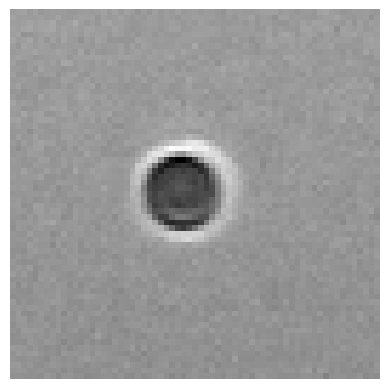

In [2]:
# Image filepath 
img_file = "./Brownian_motion/Laser/laser1_0002.tif"

# Read/Show Image
img = cv2.imread(img_file)
gray_img = cv2.imread(img_file, 0)
print(f"Filename: {img_file.split('/')[-1]}\nImage format: {img.dtype}, {img.shape}")
plt.axis('off') # remove axes 
plt.imshow(img)

# Save image
plt.savefig('test.png', bbox_inches='tight', pad_inches = 0)

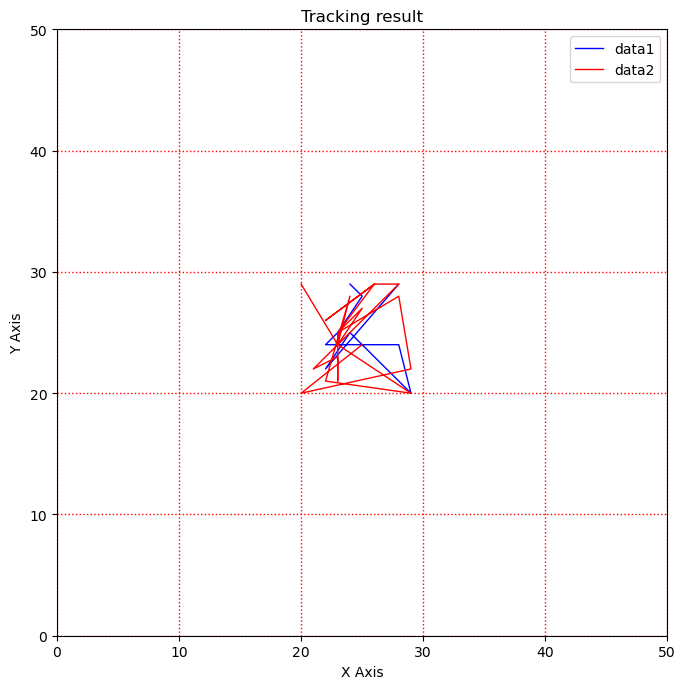

In [6]:
# Plot figure
CANVA_WIDTH = 20
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

x1 = np.random.randint(20,30,10); x2 = np.random.randint(20,30,20)
y1 = np.random.randint(20,30,10); y2 = np.random.randint(20,30,20)

fig = plt.figure(figsize =cm2inch(CANVA_WIDTH, CANVA_WIDTH))
#fig.set_size_inches(w,h) # change specific built figuresize
#plt.rc('figure', figsize=(w,h)) #change to default by ".rc"

ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, color='blue', label='data1', lw=1)
ax.plot(x2, y2, color='red', label='data2', lw=1)
ax.legend()

plt.title('Tracking result')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.axis([0, 50, 0, 50])
plt.grid(color='r', linestyle='dotted', linewidth=1)

plt.savefig('temp.png', transparent=True,bbox_inches='tight', pad_inches = 0)
plt.show()


# Post-process
- Single particle tracking (SPT)
- Mean square displacement (MSD)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 1 to 2100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2100 non-null   float64
 1   Y1      2100 non-null   float64
dtypes: float64(2)
memory usage: 32.9 KB
None
=> Calculating MSD...


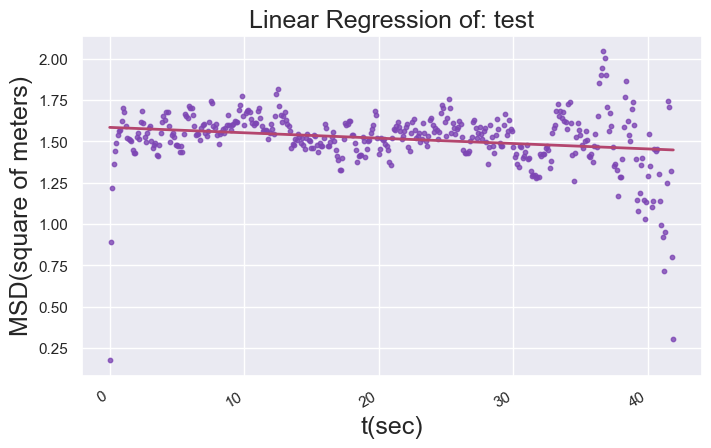

''

In [2]:
import pandas as pd
from utils import *
file = "../../../../Desktop/trackresults.txt"
df = pd.read_csv(file, sep="\t")
track_df = df.loc[1:,["X1","Y1"]]
print(track_df.info())

# Get trackresult in X,Y perspective
X = df.loc[1:,["X1"]].to_numpy()
Y = df.loc[1:,["Y1"]].to_numpy()

# MSD calculatio
MSD(X ,Y, 10, "./Export/TrackFile", 'test', ImgShow=True)
;

=> Calculating MSD...


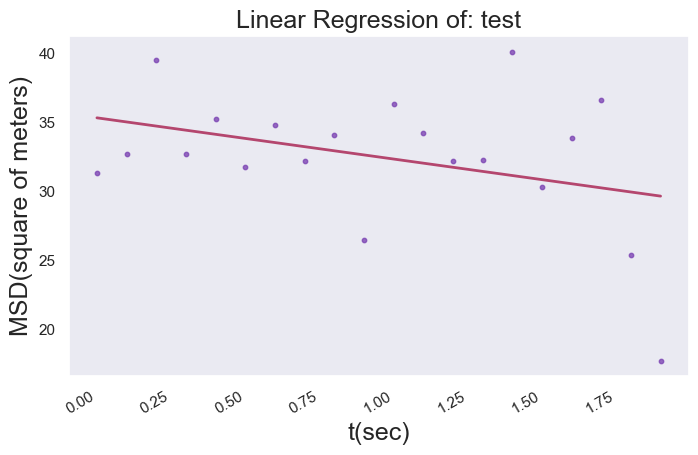

[31.323232323232325,
 32.74468085106383,
 39.561797752808985,
 32.702380952380956,
 35.278481012658226,
 31.756756756756754,
 34.84057971014492,
 32.203125,
 34.10169491525424,
 26.48148148148148,
 36.326530612244895,
 34.27272727272727,
 32.205128205128204,
 32.26470588235294,
 40.13793103448276,
 30.333333333333332,
 33.89473684210526,
 36.64285714285714,
 25.444444444444443,
 17.75]

<Figure size 640x480 with 0 Axes>

In [2]:
# MSD computation
X = np.random.randint(0,10,100) 
Y = np.random.randint(0,10,100)
MSD(X ,Y, 10, "./Export/TrackFile", 'test', ImgShow=True)
